By 
### Bernardo Vimpi
May 2020

### CAR SALES PROJECT

#### PROJECT DESCRIPTION AND OBJECTIVES

The information is about second hand cars. THe goal of this project is to predict the price of a used car depending on its specifications. We have some potential regressors such as "Brand" since some brands are more expensive than others. ANother important variable is Mileage since the longer the car has been driven the cheaper it starts to get over time. Another variable relevant to this project is the "engine volume" since sports cars, for example, have a much stronger and powerful engine than comercial cars. Last but not least the "Year" in which the car was produced is another important variable too because, the older the car, the cheaper it is. I'll need to perform Data Cleaning as well for this project.

Note: You may notice that for the Descriptive Statistics I run the code several times. Thats is for learning purposes as well as to assist anyone reading this project, especially those new to python and data science to understand step by step what I have done with the code. Otherwise I could have simply manipulated the same code several times which would skip some of the methods I highlight here, but it would also make it more challenging to those who want to learn something from my project. 

Import Libraries 

In [260]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

#### DATA LOAD

In [261]:
raw_data=pd.read_csv('1.04. Car Sales.csv')

In [262]:
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


DESCRIPTIVE STATISTICS 

In [263]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


### Results and Analysis:

The results of the descriptive statistics shows only the output for numerical variables. This is by default. Now, to include the descriptive Statistics for all variables, inlcuding the categorical variables, I need to change the code as described below.

#### DESCRIPTIVE STATISTICS FOR NUMERICAL AND CATEGORICAL VARIABLES

In [264]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Results and Analysis: 
The initial output above shows we have the descriptive statistics for all variables, numerical and categorical. Each variable has a different number of observations. This implies that there are missing values. It is very clear that we are missing values. Next, we see there are different unique entries and there are about 312 Models. That would be very challenging for regression analysis and would also imply to have around 312 dummies. Another observatuon is the frequency. For example "Registration" has about 3947 Yes. This information may not also be that useful for the project. That means I will need to drop this variable too. Additionally, most of the needed information, such as "Model" could be engineered from "Brand", "Year" and "EngiveV" and I won't be losing too much variability on the data. To remove the variable, I'll use the pandas' 'drop' method. This will also start my data cleaning process. 

    

### DATA CLEANING

##### Getting The Variables needed for this project

In [265]:
data=raw_data.drop(['Model'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


#### Results and Analysis
After dropping the "Model" variable, we can notice that "Brand", "Body", "Mileage", "Engine Type", "Registration" and "Year" seem to have no problem with missing values given the total number of observations is 4345. However, the same doesn't hold for "Price" and "EngineV". To further my analysis, I can ran another call to show and locate the missing values. Lets do that next. 

##### VERIFYING MISSING VALUES

In [266]:
data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


#### Results and Analysis:
 
After running the command "data.isnull()" I get the above results. "True" means we have missing value while "False" implies the value is available. By defaul, "True" is equal to 1 and "False" is equal to 0, I can further my code to to summ all the missing values and sum of all observations. 

#### Missing Values Sum

In [267]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

##### Results and Analysis.

Based on the above output, "Price" and "EngineV" are the only features or variables with missing values. However, only several of them not entirely. Therefore, I will proceed and delete all of those observations. The main rule here is if you are removing <5% of the observations, you are free to just remove all of the  observations that have missing values. Now I can proceed to further clean the data and remove the missing values. 

#### REMOVING MISSING VALUES: Data Cleaning

In [268]:
data_no_mv=data.dropna(axis=0)

In the above data frame, I dropped the observations; not columns. Now let's evaluate the new data with using descriptive statistics.
    

#### Descriptive Statistics for Data with no missing values

In [269]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Results and Analysis:
Lets look at the min and the max values with respect to the mean and the quartiles for each variable. Lets print the probability function for each feature for further analysis. 

#### PROBABILITY DISTRIUBUTION OF THE VARIABLES

The goal of the probabily distribution test below is for us to look for an optimal resuls which is normal distribution. 

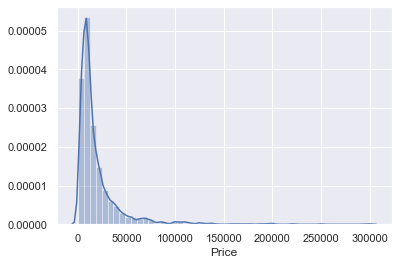

In [270]:
sns.distplot(data_no_mv['Price'])

Price has an exponential which will definetely be a problem in the regression. With regards to its descriptive statistics, "Price" has a mean of around $ 19552.

The minimum price is around $ 600.25  7000 ( 6999). 

Also 50% are  11500 and 75% are lower than  $21900.


The maximum price is $ 300000

This is strange is going on here which indicates for a possible outlier in the price variable. This will cause the coeficient to be inflated. One way to deal with this is to remove the top 1% of the observations. We can run it via the quantile argument in the code. For this issue, I want to get the 99 percentile to keep the data below the 99 percentile.

#### CONTROLING THE OUTLIERS

In [271]:
q=data_no_mv['Price'].quantile(0.99)
data_1=data_no_mv[data_no_mv['Price']<q] # since we want to keep the data below the 99 percentile
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


Results and Analysis: 

The maximum value is around $129222 or the 99th percentile. Although it is still far away from the mean, it is also relatively closer when compared to previous results. Lets now evaluate the new descriptive statistics for Price. 

#### NEW DESCRIPTIVE STATISTICS FOR PRICE

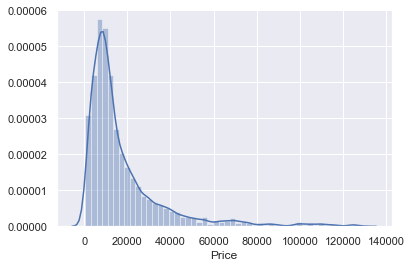

In [272]:
sns.distplot(data_1['Price'])

The data is still distributed in the same way as previously. However, this time we have fewer outliers than before.This issue for the price seems to be resolve. However, we have similar issues for "Mileage", "EngineV" and "Year". 

##### PROBABILITY DISTRIBUTIONS FOR OTHER FEATURES

Here I display the probability distribution for each feature and their corresponding improved results by keeping only the data lower than the 99th percentile.

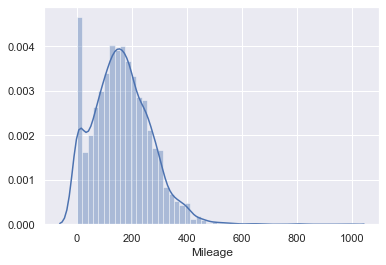

In [273]:
sns.distplot(data_no_mv['Mileage'])


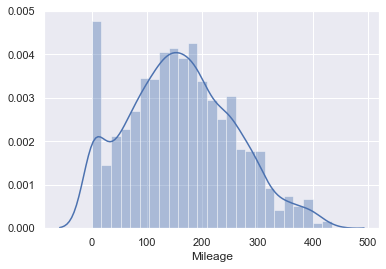

In [274]:
q=data_1['Mileage'].quantile(0.99)
data_2= data_1[data_1['Mileage']<q]
sns.distplot(data_2['Mileage'])

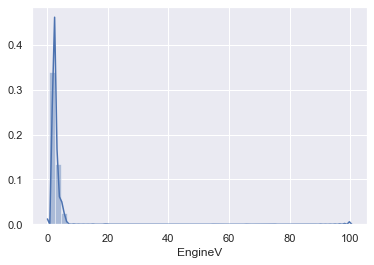

In [275]:
sns.distplot(data_no_mv['EngineV'])


When analyzing the "EngineV" we can see that some values for the EngineV are 66, 74, 90, and 99.99. These are not usual values of car engine volume. They are not representative of car engine volume. It also seems that most values are really low. A quick search on google does in fact confirm the interval an engine volume should fall is between 0.6 and 6.5. Therefore, those high values I mentioned above are incorrect entries on the original source of the dataset. In fact, a very commom method to label missing values is by assigning 99.99. Although that used to be a very commom practice decades ago, it is a not the best practice to lable missing values becuase it creates a challenge for other users of the data to distinguish them from true values.Nonetheless, it is important to highlight that some people or organizations still do it. Since the benchmark is 6.5, I will remove all values that are above 6.5.

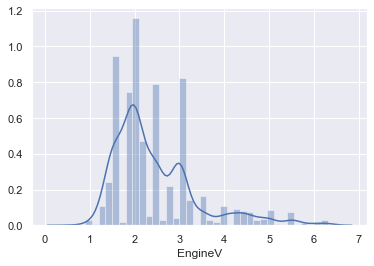

In [276]:
q=data_1['EngineV'].quantile(0.99)
data_3= data_2[data_2['EngineV']<6.5]
sns.distplot(data_3['EngineV'])

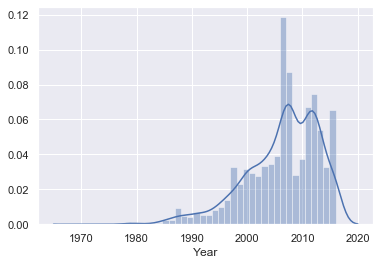

In [277]:
sns.distplot(data_no_mv['Year'])

The problem with year is in the low end. Most cars are newer bu some are also old. In this case, I will simply take the 1rst percentile and keep all of the observations that are higher. 

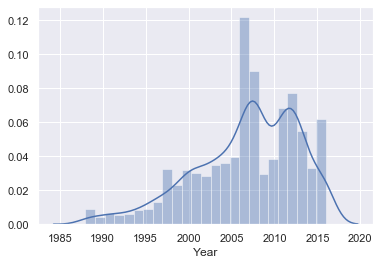

In [278]:
q=data_3['Year'].quantile(0.01)
data_4= data_3[data_3['Year']>q]
sns.distplot(data_4['Year'])

#### DATA CLEANED VARIABLE

Lets create a data variable and reset the index. The variable will be called "data cleaned" since it contains the data that has been successfully cleaned. So far, the indeces of the data frame make refence to all the data including the observations that were removed. However, I want them to describe only the data useful for analysis. I will use the reset_index data frame

In [279]:
data_cleaned = data_4.reset_index(drop=True)# Drop=True to completely leave the old index and use the new one

In [280]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


All the min and max seem about right. So far I have deleted around 250 observations. 

### EVALUATING OLS ASSUMPTIONS

Here I will evaluate some of the OLS assumptions. So far I have identified some of the variables that are potential regressors.The categorical variables will be includes as dummies. That way, there is no need to worry about them when checking the assumptions.On the other side, the continuous variables such as "Year", "EngineV", and "Mileage" are the ones that are likely to be more challenging and cause some issues.

## OLS Assumptions: 

### LINEARITY:

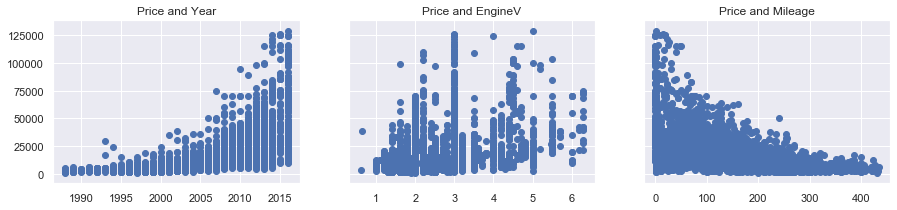

In [281]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey =True, figsize= (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

Results: Here we can spots patters but they are not linear ones. For this reason, linear regression is not recommended here. Thus, there is a need to transform one or more variables.If you look back at the probability distribution of price, we noticed that price is not normally distributed. Therefore, its relationship with other normally distributed features are nit linear since the patters are exponetial. One way to deal with this issue is to use "log transformation". Log transformations are especially useful when facing exponential relationships. I take the log of price and create another plot.

In [282]:
log_price =np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


Lets perform another plot using the "log_price

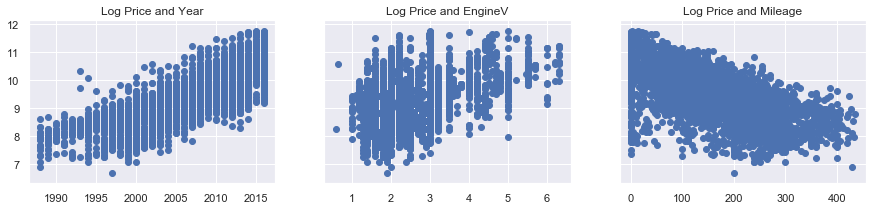

In [283]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey =True, figsize= (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')
plt.show()

Results: now we can see a liniear patter in all plots. Since I no longer need the original price from the data fram, I can simply drop it. 

In [284]:
data_cleaned=data_cleaned.drop(['Price'], axis =1)

####  NO ENDOGENEITY 
This is the second assumption to evaluate.There are tests to check if it is violeted or one can take the residuals and find the correlations with each independent x. For now, I can tell you the assumption is not violated. Furthermore, we'll discusss them soon after the regression is created. 

#### NORMALITY AND HOMOSCEDASTICITY
This assimpion has several parts.
A. Normality is assumed for big sample using the Central Limit Theorem. 
B. Zero Mean of distribution of error: this is accomplished through the inclusion of the intercept of the regression.
C. Homoscedasticity: which is a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables. In this case, this is already fixed here due to the log transformation I employed to fix the heteroscedasticity which refers to the circumstance in which the variability of a variable is unequal across the range of values of a second variable that predicts it. 


#### NO OUTOCORRELATION
Here, there is no really need to put too much effort to evaluate this assumption. This is because the observations that we have here are not coming from a time series data or panel data. They are simply a snapshot of sales for a second-hand carshop. Each row comes from a different customer who is willing to sale their car to platform. Therefore, logically, there is no reason for each observation to be dependent on each other. Therefore, we can pass this assumption and move to the next.

### Multicollinearity

We need to chek for multicollinearity. It is logical that "Year" and "Mileage" are going to be correlated. This is because, the newer the car, the lower its mileage and voice versa. Therefore, we have sufficient support to expect some degree of multicollinearity in the data. Unfortunately, Sklearn doesn't have a method to check this assumption. We then have to use the "StatsModels". One of the best ways to check for multicollinearity is VIF which stands for variance inflation factor. The VIF produces a measure to estimate how much larger the squared-root of an error of estimation is, compared to a situation where the variable was completely uncorrelated with the other predictors. Lets evaluate the code below

In [285]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif =pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"]=variables.columns

In [286]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


When vif =1 that means there is no multicollinearity. 1 is also the minimum value of the measure. Generally vif  values between 1 and 5 are considered perfectly ok. However, some sources state that vif above 5 is unacceptable. Some put the cut off line at 6 while others at 10. Unfortunately, there is no consensus in this topic. Nonetheless, we rarely may find dat that is so perfect that all features have vif value below 5. For now, lets be conservative here in this project. For this project and above results, it is clear that Year is too correlated with other variables. Therefore, I will only remove "Year". 

In [287]:
data_no_multicollinearity = data_cleaned.drop (['Year'], axis =1)

#### DUMMY VARIABLES CREATION

Lets add multiple dummies at the same time using Pandas (pd.get_dummies). This method will spot all categorical variables and create dummies automatically. If we have N categories for a feature, we have to create N-1 dummies.

In [288]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first= True)
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


#### Rearrange the data 

In [289]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [290]:
cols= ['log_price','Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [291]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


#### DATA STANDARDIZATION AND REGRESSION CREATION

#### Lets Declare in inputs and Targets

Our target is the log price and our inputs are data preprocessed without log price.

In [292]:
targets= data_preprocessed ['log_price']
inputs = data_preprocessed.drop(['log_price'], axis =1)


#### Scale the Data

In [293]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [294]:
## Were we standardize all the inputs. Caution needs to be taken to not always standardize dummy variables. some opose this.
input_scaled = scaler.transform(inputs)

 ### SPLIT THE DATA INTO TRAINING AND TESTING

In [295]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (input_scaled, targets, test_size = 0.2, random_state = 365)

#### CREATE REGRESSION

In [296]:
reg =LinearRegression()
reg.fit(x_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [297]:
y_hat =reg.predict(x_train)

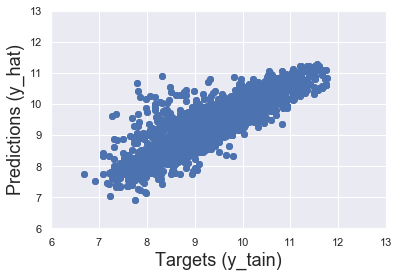

In [298]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_tain)',size=18)
plt.ylabel('Predictions (y_hat)', size =18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

We can also check he residual plot, which is the differences between the targets and the predictions

Text(0.5, 1.0, 'Residuals PDF')

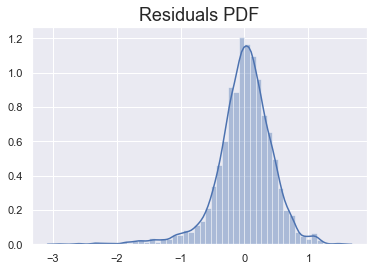

In [299]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size =18)

From the regression assumptions we know the errors must be normally distributed with the mean of zero. The residuals are the estimates of the errors, so we would expect the same from them. The results look normal since they are normally distributed. The mean seems to be 0 as well. The only potential issue is the much longer tail on the negative side. Therefore, there are certain observations for which y_train - y_hat is much lower than the mean (as ,much higer price is predicted than is observed). This implies that those predictions tend to overstimate the target. Since we don't see the same trend of observations on the right side, we can conclude that predictions rarely underestimate the targets.

#### R-SQUARED CALCULATION

In [300]:
reg.score(x_train, y_train)

C:\Users\bev\Anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.7449965787926618

The result is around 75%. This implies that this model explains 75% of the variability of the data. This is relatively good result although it could be also improved.

#### FIND THE WEIGHTS AND BIAS


In [301]:
#bias is in reg intercept
reg.intercept_

array([9.41523946, 9.41523946])

In [302]:
#weights is in reg.coef
reg.coef_ # we can also create a summary table(below) for the weight

array([[-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
        -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
        -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
        -0.14690868,  0.32047333],
       [-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
        -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
        -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
        -0.14690868,  0.32047333]])

Some weights are positives while others are negatives. A positive weights indicates that tas a feature increase in value, so do the log_price and 'Price' respectively. A good example is the engineV: the bigger the enginev the higher the price. On the other side, a negative weight shows thhat as a feature increases in value, log_price and 'Price decrease. A primary example is Mileage. 

### Testing

In [303]:
y_hat_test = reg.predict(x_test)

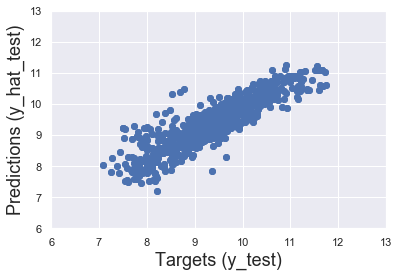

In [304]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)', size =18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

The model seems to be good at predicting higher prices than lower ones. They seem to be more scattered at the bottom. We can include Alpha to the scatterplot to the proportionality of the points. Alpha takes tha values of 0 to 1 with 1 being the default. Let's use the value of 0.2 in this case. 

### Adding Alpha to the scatterplot

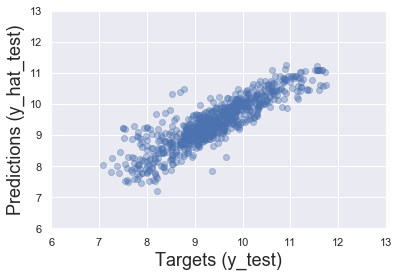

In [305]:
plt.scatter(y_test, y_hat_test, alpha =0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)', size =18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

The graph turns like a heat map: The more saturated the coler, the higher the concentration of points. The paler the coler the lower the concentration of the points. Thus, we have a much clear indication showing a higher concentration along the (imaginary) 45 degree line. 

In [306]:
y_test


,log_price,log_price
1192,7.740664,7.740664
3360,7.937375,7.937375
2350,7.824046,7.824046
3257,8.764053,8.764053
892,9.121509,9.121509
...,...,...
1935,10.292146,10.292146
3757,9.169518,9.169518
3134,9.814656,9.814656
1369,11.134589,11.134589


In [307]:
y_test = y_test.reset_index(drop =True)
y_test.head()

,log_price,log_price
0,7.740664,7.740664
1,7.937375,7.937375
2,7.824046,7.824046
3,8.764053,8.764053
4,9.121509,9.121509


Analysing all results and the dataset, we can see that  we do have a lot of outliers that are negative and their predictions can be higher than the targets. An explanation could be that there might be other factors missing in the dataset which could be driving the price of used cars. It could also the model of the car whic was removed at the beginning of the analysis. It may also be the fact that the car was damaged in some way. In summary, this is an exercise and there are always ways to improve the models: use different set of variables, remove a bigger part of the outliers or use a different kinds of transformations.

Thank you

#### Bernardo Vimpi
May 2020